<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

<h1><center> TP2: Pandas, data analysis library </center></h1>

The deadline for report submission is Tuesday, December 14th 2021.

Note: the goal of this TP is to become familiar with 'pandas' class in Python. This library is often used for data analysis and is convenient for manipulation tool.
We consider a case study based on a dataset that contains information about bookings of two hotels. Hotel 1 is a resort hotel and Hotel 2 is a city hotel in Portugal. The dataset was released by https://www.sciencedirect.com/science/article/pii/S2352340918315191.

We first list the basic function in pandas. PART 1 aims at using pandas as a visualization tools to a better understanding of data. PART 2 shows how easy it is to combine "pandas" dataframes and "sklearn" models to build additional features and predict. 

As a homework, we propose you a very concret problem which is open and for which we are waiting for your creativity (as usual)!

In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

# Short intro into pandas

In [4]:
data = pd.read_csv("data/bookings.csv") 

In [5]:
data.head(5) # print first 5 entries of the dataset

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
data.columns # print column names

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

This dataset contains information about bookings of two hotels. Hotel 1 is a resort hotel and Hotel 2 is a city hotel in Portugal. The dataset was released by https://www.sciencedirect.com/science/article/pii/S2352340918315191.

There are 32 columns in this dataset:

1. **hotel** -- one of the two hotels
2. **is_canceled** -- Value indicating if the booking was canceled (1) or not (0)
3. **lead_time** -- Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
4. ....

For the full description of each column please see: https://www.kaggle.com/jessemostipak/hotel-booking-demand

In [7]:
data['country'] # we can also print each column of the dataset

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 119390, dtype: object

In [8]:
data['country'].unique() # list all unique values in the column

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [9]:
data.count()

hotel                             119390
is_canceled                       119390
lead_time                         119390
arrival_date_year                 119390
arrival_date_month                119390
arrival_date_week_number          119390
arrival_date_day_of_month         119390
stays_in_weekend_nights           119390
stays_in_week_nights              119390
adults                            119390
children                          119386
babies                            119390
meal                              119390
country                           118902
market_segment                    119390
distribution_channel              119390
is_repeated_guest                 119390
previous_cancellations            119390
previous_bookings_not_canceled    119390
reserved_room_type                119390
assigned_room_type                119390
booking_changes                   119390
deposit_type                      119390
agent                             103050
company         

This dataset contains 119390 different reservations. Some of the reservations have missing values.


In [10]:
data.values # A data frame can be converted into a numpy array by calling the values attribute:

array([['Resort Hotel', 0, 342, ..., 0, 'Check-Out', '2015-07-01'],
       ['Resort Hotel', 0, 737, ..., 0, 'Check-Out', '2015-07-01'],
       ['Resort Hotel', 0, 7, ..., 0, 'Check-Out', '2015-07-02'],
       ...,
       ['City Hotel', 0, 34, ..., 4, 'Check-Out', '2017-09-07'],
       ['City Hotel', 0, 109, ..., 0, 'Check-Out', '2017-09-07'],
       ['City Hotel', 0, 205, ..., 2, 'Check-Out', '2017-09-07']],
      dtype=object)

However this array cannot be directly fed to a scikit-learn model.

1. the values are heterogeneous (strings for categories, integers, and floating point numbers)
2. some attribute values are missing

# Predicting cancellation: Part I -- visualization

**Our goals** The goal of this part is to provide few examples of visualization combining ```pandas```, ```matplotlib```, ```seaborn```. 

We will look at a very natural and practical task -- predicting cancellation of a given reservation. Of course, the first instinct of the modern 'ML practitioner' is to throw all the data to some neural net and perform bunch of fine-tuning. There are really a lot of problems with such an approach. As a general rule of thumbs: explore your data before building ML pipelines! It is alway more interesting to investigate the data and find human-interpretable patterns.

Pandas allows to manipulate the dataset in a very convenient manner. Those familiar with SQL will certainly appreciate it! 

As the first visualization task let us understand which monthes have the most amount of cancellations.
We start by creating a new dataset that contains the information that we would like to plot.

In [11]:

'''
 We create two datasets for each hotel .groupby("arrival_date_month") will group observations by the month
 and .count() function will simply count the amount of reservations for each month
'''
n_reserv_H1 = data.loc[(data["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["hotel"].count()
n_cancel_H1 = data.loc[(data["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

# same thing we do for the second hotel
n_reserv_H2 = data.loc[(data["hotel"] == "City Hotel")].groupby("arrival_date_month")["hotel"].count()
n_cancel_H2 = data.loc[(data["hotel"] == "City Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

In [12]:
n_reserv_H1.head() # again we can have a look at the top 5 entries

arrival_date_month
April       3609
August      4894
December    2648
February    3103
January     2193
Name: hotel, dtype: int64

In [13]:
n_reserv_H1['April'] # number of reservation for Resort Hotel for April

3609

In [14]:
n_cancel_H1['April'] # number of cancelled reservations for Resort Hotel

1059

In [15]:
# finally, we gather everything together


data_visualH1 = pd.DataFrame({"hotel": "Resort Hotel",
                                "month": list(n_reserv_H1.index),
                                "n_booking": list(n_reserv_H1.values),
                                "n_cancel": list(n_cancel_H1.values)})
data_visualH2 = pd.DataFrame({"hotel": "City Hotel",
                                "month": list(n_reserv_H2.index),
                                "n_booking": list(n_reserv_H2.values),
                                "n_cancel": list(n_cancel_H2.values)})
data_visual = pd.concat([data_visualH1, data_visualH2], ignore_index=True)

# notice how easy it is to add a new column. We simply write the following
data_visual["percent_cancel"] = data_visual["n_cancel"] / data_visual["n_booking"] * 100 # percent of cancelations

In [16]:
data_visual.head() # our final dataset

,hotel,month,n_booking,n_cancel,percent_cancel
0,Resort Hotel,April,3609,1059,29.343308
1,Resort Hotel,August,4894,1637,33.449121
2,Resort Hotel,December,2648,631,23.829305
3,Resort Hotel,February,3103,795,25.620367
4,Resort Hotel,January,2193,325,14.819881


<IPython.core.display.Javascript object>


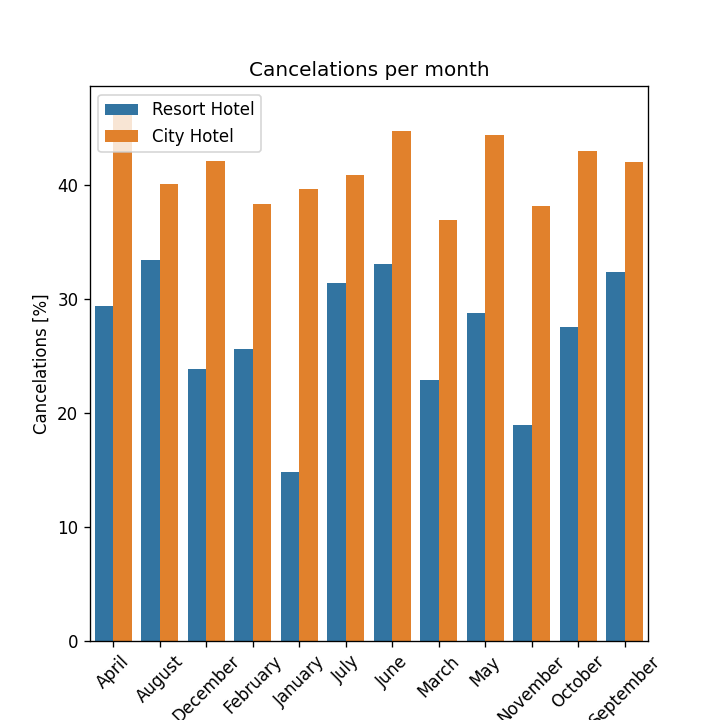

In [17]:
# plotting is simple once we have good dataset.
plt.figure(figsize=(6, 6))
sns.barplot(x = "month", y = "percent_cancel" , hue="hotel",
            hue_order = ["Resort Hotel", "City Hotel"], data=data_visual)
plt.title("Cancelations per month")
plt.xticks(rotation=45)
plt.ylabel("Cancelations [%]")
plt.legend()
plt.show()

Previous plot is nice, but the ordering of the month is very annoying!

**Question 1.** Propose a solution that will re-order the barplot above using standard month ordering. Hint: use ```pd.Categorical()``` function of pandas.

In [18]:
month_order = ["January", "February", "March", "April", 'May', 'June', 'July', 'August', 'September', 'October',
              "November", 'December']

cat=pd.CategoricalDtype(categories = month_order, ordered = True)

In [19]:
cat

CategoricalDtype(categories=['January', 'February', 'March', 'April', 'May', 'June',
                  'July', 'August', 'September', 'October', 'November',
                  'December'],
, ordered=True)

<IPython.core.display.Javascript object>


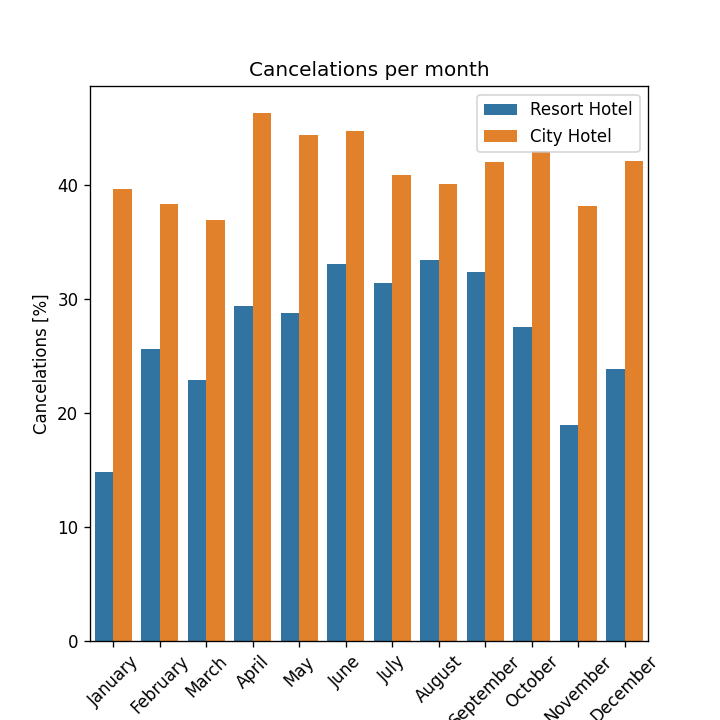

In [20]:
data_visual['sort']= pd.Series(data_visual['month'], dtype = cat)

# plotting is simple once we have good dataset.
plt.figure(figsize=(6, 6))
sns.barplot(x = "month", y = "percent_cancel" , hue="hotel",
            hue_order = ["Resort Hotel", "City Hotel"], data=data_visual.sort_values(by=['sort']))
plt.title("Cancelations per month")
plt.xticks(rotation=45)
plt.ylabel("Cancelations [%]")
plt.legend()
plt.show()

data_visual.drop(['sort'], axis=1, inplace=True)

**Question 2.** Provide interpretation of the above plot.

In [27]:
data_visual.loc[data_visual["hotel"]=="Resort Hotel"].describe()

,n_booking,n_cancel,percent_cancel
count,12.000000,12.000000,12.000000
mean,3338.333333,926.833333,26.831122
std,792.500913,371.330736,5.861114
min,2193.000000,325.000000,14.819881
25%,2945.750000,730.000000,23.589905
50%,3222.000000,992.000000,28.141338
75%,3571.500000,1032.750000,31.643300
max,4894.000000,1637.000000,33.449121


In [26]:
data_visual.loc[data_visual["hotel"]=="City Hotel"].describe()

,n_booking,n_cancel,percent_cancel
count,12.000000,12.000000,12.000000
mean,6610.833333,2758.500000,41.374904
std,1825.866361,854.461925,2.900231
min,3736.000000,1482.000000,36.946423
25%,4813.000000,1860.750000,39.323075
50%,7440.000000,3189.000000,41.451199
75%,7942.500000,3480.750000,43.322699
max,8983.000000,3653.000000,46.323529


**Question 3.** What is the most and the second most common country of origin for reservations of each hotel?

In [37]:
data.loc[(data["hotel"] == "Resort Hotel")].groupby("country")["hotel"].count().sort_values(ascending=False)

country
PRT    17630
GBR     6814
ESP     3957
IRL     2166
FRA     1611
       ...  
MKD        1
PLW        1
PER        1
MUS        1
CYM        1
Name: hotel, Length: 125, dtype: int64

In [38]:
data.loc[(data["hotel"] == "City Hotel")].groupby("country")["hotel"].count().sort_values(ascending=False)

country
PRT    30960
FRA     8804
DEU     6084
GBR     5315
ESP     4611
       ...  
MRT        1
SDN        1
NAM        1
NCL        1
KIR        1
Name: hotel, Length: 166, dtype: int64

**Question 4.** Plot the number of cancelations for repeated and not repeated guests for both hotels.

<IPython.core.display.Javascript object>


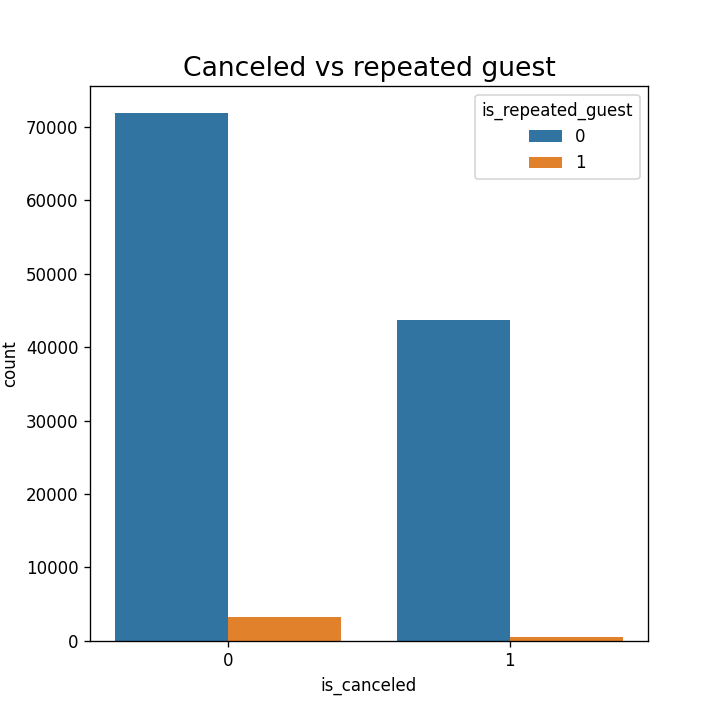

[]

In [39]:
plt.figure(figsize=(6, 6))
sns.countplot(x="is_canceled", hue='is_repeated_guest', data=data)
plt.title("Canceled vs repeated guest", fontsize=16)
plt.plot()

Most guests in these two hotels are not repeated, while the repreated guests are less likely to cancel.

<IPython.core.display.Javascript object>


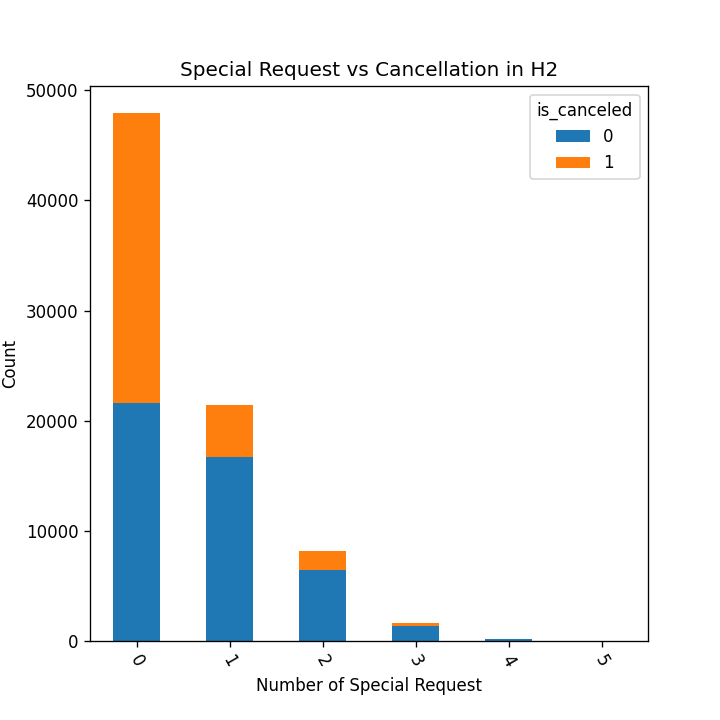

Text(0, 0.5, 'Count')

In [40]:
data_req = data[(data['hotel'] == 'City Hotel')].groupby(['total_of_special_requests', 'is_canceled']).size().unstack(level=1)
data_req.plot(kind='bar', stacked=True, figsize=(6,6))
plt.title('Special Request vs Cancellation in H2')
plt.xlabel('Number of Special Request', fontsize=10)
plt.xticks(rotation=300)
plt.ylabel('Count', fontsize=10)

Most of the reservations in the city hotel have no special requests and the cancelation in this case is almost 50/50. However, when special requests are made, the cancelation rate is significantly lower.

**Question 5.** Make the same plot for Resort Hotel. Make your conclusions.

<IPython.core.display.Javascript object>


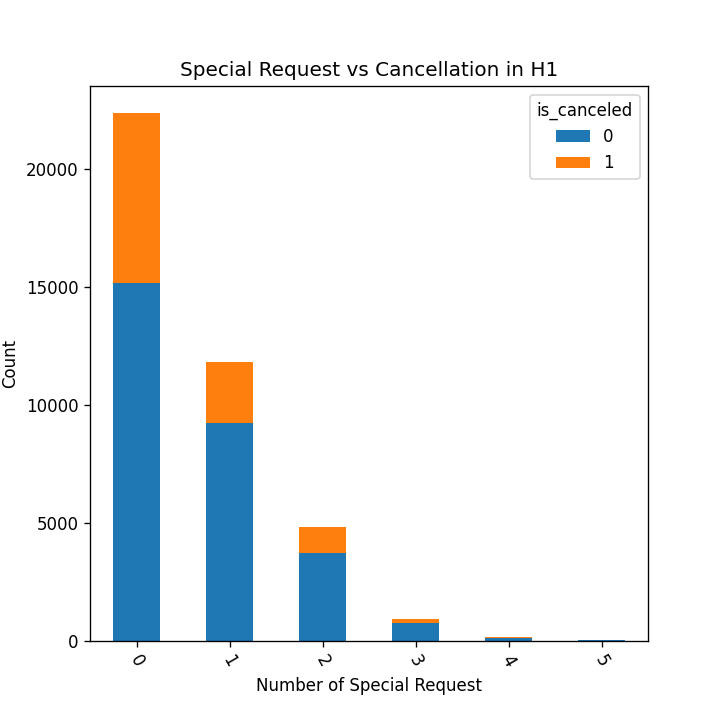

Text(0, 0.5, 'Count')

In [43]:
data_req = data[(data['hotel'] == 'Resort Hotel')].groupby(['total_of_special_requests', 'is_canceled']).size().unstack(level=1)
data_req.plot(kind='bar', stacked=True, figsize=(6,6))
plt.title('Special Request vs Cancellation in H1')
plt.xlabel('Number of Special Request', fontsize=10)
plt.xticks(rotation=300)
plt.ylabel('Count', fontsize=10)

# Predicting cancellations: Part II -- ML

**Our goals** The main message here is -- do not re-invent the wheel. The following few lines of code highlight the simplicity with which we can combine ```pandas``` dataframes and ```sklearn``` models. By learning few simple tools (i.e. ```pipeline```, ```gridsearchcv```) our code becomes readable, compact, and can be used to build extra features on top of it.

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [29]:
numeric_features = ["lead_time", "arrival_date_week_number", "total_of_special_requests"]
categorical_features = ["hotel", "market_segment","deposit_type","customer_type"]
features = numeric_features + categorical_features
X = data.drop(["is_canceled"], axis=1)[features]
y = data["is_canceled"]

Before using any ML algorithm from sklearn we need to handle missing values. There is no unique answer on how to deal with missing values in your dataset. We will use possibly the simplest approach. First of all if the feature is numerical and is misisng, we are going to replace it with zero. Secondly, if the feature is categorical and is missing, then we are going to define a new category and call it ```Not defined```.

In [30]:
numeric_transformer = SimpleImputer(strategy="constant", fill_value=0) # to deal with missing numeric data
categorical_transformer = Pipeline(steps=[
                                    ("imputer", SimpleImputer(strategy="constant", fill_value="Not defined")),
                                    ("onehot", OneHotEncoder(handle_unknown='ignore'))]) # to deal with missing categorical data 
preproc = ColumnTransformer(transformers=[("num", numeric_transformer, numeric_features),
                                          ("cat", categorical_transformer, categorical_features)])

**Question:** What is ```OneHotEncoder()```? Why do we use it in our case?

OneHotEncoder allows to encode categorical in numerical data to feed our ML algorithms with. For one feature, it creates n_classes number of columns (as many columns as classes or values for the given feature). Each column now represents 1 class and the value will be 1 (resp. 0) if the entry row belongs to the class (resp. doesn't belong to the class). 

Now imagine a situation when you want to try a lot of different models and for each model you want to make some cross-validation to select the best hyperparameters. On top of that you want to preprocess the data so that you feed something meaningfull into each method.

The next chunk of code shows how to do it.

In [31]:
models = [("logreg", LogisticRegression(max_iter=500))]
grids = {"logreg" : {'logreg__C': np.logspace(-2, 2, 5, base=2)}}
for name, model in models:
    pipe = Pipeline(steps=[('preprocessor', preproc), (name, model)])
    clf = GridSearchCV(pipe, grids[name], cv=3)
    clf.fit(X, y)
    print('Results for {}'.format(name))
    print(clf.cv_results_)

/home/noureddineidir/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/noureddineidir/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

Results for logreg
{'mean_fit_time': array([3.11275824, 2.9943618 , 4.36192489, 4.46217354, 4.41834482]), 'std_fit_time': array([0.41777973, 0.07315151, 0.16859802, 0.01522259, 0.10398612]), 'mean_score_time': array([0.06412315, 0.07898943, 0.09378497, 0.0917275 , 0.09487637]), 'std_score_time': array([0.00448373, 0.01002884, 0.00599159, 0.00646027, 0.00670022]), 'param_logreg__C': masked_array(data=[0.25, 0.5, 1.0, 2.0, 4.0],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'logreg__C': 0.25}, {'logreg__C': 0.5}, {'logreg__C': 1.0}, {'logreg__C': 2.0}, {'logreg__C': 4.0}], 'split0_test_score': array([0.70128402, 0.70128402, 0.70128402, 0.70128402, 0.70123376]), 'split1_test_score': array([0.78221977, 0.78209413, 0.78229515, 0.78146594, 0.78189311]), 'split2_test_score': array([0.73605387, 0.73587798, 0.73502362, 0.7356267 , 0.73404362]), 'mean_test_score': array([0.73985255, 0.73975204, 0.73953426, 0.73945888, 0.73905

/home/noureddineidir/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Question:** In the previous example we again encounter the convergence problem. Of course we can set higher number of iterations, but it is time consuming. As you have seen, proper normalization can resolve the issue. Insert a normalization step in the pipeline. Note that we do not want to normalize the categorical data, it simply does not make sense. Be careful to normalize only the numerical data. Did it resolve the warning?

**Question:** As we can see, previous code uses only logistic regression. Modify the above code inserting your favorite ML method.

**Remark:** Note that in this part we picked only a small subset of features. We could have used other features as well.



In [32]:
# modify the pipeline for numerical values

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler

numeric_transformer = SimpleImputer(strategy="constant", fill_value=0) # to deal with missing numeric data

numeric_transformer2 = Pipeline(steps =[
                                    ('impute', numeric_transformer),
                                    ('scaling', StandardScaler())])

categorical_transformer = Pipeline(steps=[
                                    ("imputer", SimpleImputer(strategy="constant", fill_value="Not defined")),
                                    ("onehot", OneHotEncoder(handle_unknown='ignore'))]) # to deal with missing categorical data 

preproc2 = ColumnTransformer(transformers=[("num", numeric_transformer2, numeric_features),
                                          ("cat", categorical_transformer, categorical_features)])

In [33]:
models = [("logreg", LogisticRegression(max_iter=500))]
grids = {"logreg" : {'logreg__C': np.logspace(-2, 2, 5, base=2)}}
for name, model in models:
    pipe = Pipeline(steps=[('preprocessor', preproc2), (name, model)])
    clf = GridSearchCV(pipe, grids[name], cv=3)
    clf.fit(X, y)
    print('Results for {}'.format(name))
    print(clf.cv_results_)

Results for logreg
{'mean_fit_time': array([0.85248788, 1.11967882, 1.20653033, 1.64963889, 1.36653622]), 'std_fit_time': array([0.12458907, 0.25252161, 0.48176625, 0.62905462, 0.07564947]), 'mean_score_time': array([0.06594706, 0.06591185, 0.07220944, 0.10018333, 0.09524139]), 'std_score_time': array([0.00477751, 0.00501703, 0.00774627, 0.00349069, 0.00634575]), 'param_logreg__C': masked_array(data=[0.25, 0.5, 1.0, 2.0, 4.0],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'logreg__C': 0.25}, {'logreg__C': 0.5}, {'logreg__C': 1.0}, {'logreg__C': 2.0}, {'logreg__C': 4.0}], 'split0_test_score': array([0.70128402, 0.7000779 , 0.68432294, 0.67427193, 0.66600498]), 'split1_test_score': array([0.78259668, 0.78244591, 0.78221977, 0.78221977, 0.78219464]), 'split2_test_score': array([0.73585285, 0.73582772, 0.73582772, 0.736079  , 0.73605387]), 'mean_test_score': array([0.73991118, 0.73945051, 0.73412348, 0.7308569 , 0.72808

# The homework

**The story!**
You are a data scientist working for the hotel, one day the manager comes and tells you.

In our hotels we have an option to offer a parking spot, which costs money. Apparently, not every customer is aware that we have such an option. I really want to offer parking spots for everyone who needs it, because the hotel can earn more money like that. Look, I can send an SMS notification to our customers. Of course SMS are not free, and, moreover, people get very much angry if they receive stupid notifications for no reason. For each new reservation, I would like to decide if I should or shouldn't send the notification to the customer.

**Problem** Explore your data to help the manager and construct a prediction algorithm, using the above template as an inspiration. 

**Warning!** Be aware, that some columns are not actually avaiable at the moment of reservation. For instance, the target column ```is_canceled``` from the previous part clearly cannot be observed at the moment when we need to decide to send the SMS.

In [9]:
data['required_car_parking_spaces'] 

array([0, 1, 2, 8, 3])